# 2019.06.22 - 분석을 시작하기 전

## EDA (Exploratory Data Analysis)

**(탐색적 데이터 분석)**

- 적합한 전처리 및 모형 적용을 위해 데이터를 이해하기 위한 과정

### 목적 설정

- 목적에 따라 분석의 방향이 달라지고, 입장에 다라 목적 또한 달라진다.
  - 서비스 기획자: 전체적인 플랫폼 현황 파악
  - 게임 개발자: 많이 팔리는 게임의 특징 파악
  - 플랫폼 마케팅: 많이 구매하는 유저의 특징 파악
  
  
### 가설 설정

- 최대한 주어진 데이터 내에서 도메인 지식을 동원하여 가설 설정
- 가설 설정을 위해 집중해야할 요소를 특정한다.

#### Example

- 많이 팔리는 게임은 유저의 평균 플레이 시간이 매우 높을 것이다.

# Variable Type

## Categorical Variable (범주형 변수)

- 연산 불가

- 성별, 음식종류, 학점

<br>

## Continuous Variable (연속형 변수)

- 연산 가능

- 점수, 키, 몸무게

# Steam Video Games

## `read_csv` Parameters

- `usecols`: 사용할 column 지정  
- `names`: Header 생성하여 사용하는 column 의 이름을 순서대로 지정

In [1]:
import pandas as pd
import matplotlib.pylab as plt


df = pd.read_csv('../data/steam-200k.csv',
                usecols=range(3+1),
                names=['userID', 'gameName', 'behavior', 'hours'],
                )

## Get Information of data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
userID      200000 non-null int64
gameName    200000 non-null object
behavior    200000 non-null object
hours       200000 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.1+ MB


> Variable Type 이 `object` 인 변수는 연산 불가임을 고려한다. (Categorical Variable)

In [3]:
df.describe()  # Data type 이 Continuous 인 경우만 연산하야 출력해준다.

,userID,hours
count,2.000000e+05,200000.000000
mean,1.036559e+08,17.874384
std,7.208074e+07,138.056952
min,5.250000e+03,0.100000
25%,4.738420e+07,1.000000
50%,8.691201e+07,1.000000
75%,1.542309e+08,1.300000
max,3.099031e+08,11754.000000


## Get columns and rows of data

- `df.shape`
- `df.row`
- `df.columns`
- `df.size` == `df.shape[0] * df.shape[1]`
- `df.count()`
- `df.describe()`

In [4]:
len_row = df.shape[0]
len_col = df.shape[1]
print(f'Data length of row: {len_row}')
print(f'Data length of column: {len_col}')

Data length of row: 200000
Data length of column: 4


In [5]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=200000, step=1)
Index(['userID', 'gameName', 'behavior', 'hours'], dtype='object')


In [6]:
print(len(df.index))  # equal to df.shape[0]
print(len(df.columns))  # equal to df.shape[1]
print(df.size)  # equal to df.shape[0] * df.shape[1]

200000
4
800000


In [7]:
print(df.count())

userID      200000
gameName    200000
behavior    200000
hours       200000
dtype: int64


In [8]:
print(df.count()[0])
print(df.count()[1])
print(df.count()[2])
print(df.count()[3])

200000
200000
200000
200000


## Process

- `df['behavior']` : behavior 열 전부
- `df['behavior'] == 'play'` : behavior 열에서 해당 조건 만족하는 row(index)

In [9]:
play_bool = df['behavior'] == 'play'
purchase_bool = df['behavior'] == 'purchase'

purchase_bool[:5]

0     True
1    False
2     True
3    False
4     True
Name: behavior, dtype: bool

In [10]:
df_play = df[play_bool] # behavior 가 play 에 해당하는 row (index) 출력
df_purchase = df[purchase_bool]  # behavior 가 purchase 에 해당하는 row (index) 출력

In [11]:
df_play['behavior'].unique()

array(['play'], dtype=object)

In [12]:
user_num = df['userID'].nunique()  # 12393
game_num = df['gameName'].nunique()  # 5155
purchase_num = len(df_purchase)  # 129511
play_num = len(df_play)  # 70489
non_play_ratio = ( (purchase_num - play_num) / purchase_num ) * 100

print(f'총 유저수: {user_num}')
print(f'총 게임수: {game_num}')
print(f'전체 구매횟수: {purchase_num}')
print(f'전체 플레이횟수: {play_num}')
print(f'전체 구매의 {non_play_ratio:0.1f}% 가 구매만 되고 플레이 없음')

총 유저수: 12393
총 게임수: 5155
전체 구매횟수: 129511
전체 플레이횟수: 70489
전체 구매의 45.6% 가 구매만 되고 플레이 없음


In [13]:
df_play.describe()

,userID,hours
count,7.048900e+04,70489.000000
mean,1.058812e+08,48.878063
std,7.150365e+07,229.335236
min,5.250000e+03,0.100000
25%,4.934256e+07,1.000000
50%,9.169067e+07,4.500000
75%,1.556738e+08,19.100000
max,3.099031e+08,11754.000000


- 누적 백분율 75% 해당하는 수가 19, 평균은 49
- 4분위수를 살퍄보면 작은 수에 값이 치우쳐짐
- 오른쪽으로 긴 꼬리를 가진 정적 비대칭(Positive Skew) 형태

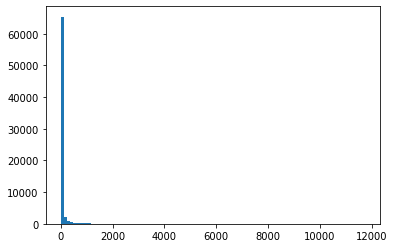

In [14]:
_ = plt.hist(df_play['hours'], bins=100)  # bins : x축 경계값 범위크기

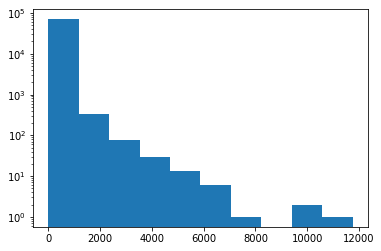

In [15]:
_ = plt.hist(df_play['hours'], log=True)  # log 로 정규화

## 유저별로 살펴보기

In [16]:
user_play_sum = df_play.groupby('userID').sum()  # userID 기준으로 continuous 데이터를 sum 하여 보여준다.
user_play_sum.describe()

,hours
count,11350.000000
mean,303.556458
std,789.541803
min,0.100000
25%,2.300000
50%,19.500000
75%,198.975000
max,11754.000000


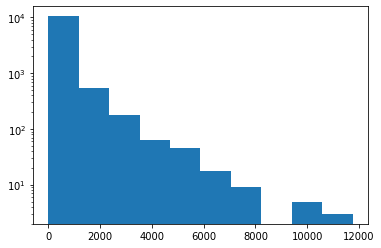

In [17]:
_ = plt.hist(user_play_sum['hours'], log=True)

In [18]:
user_pur_sum = df_purchase.groupby('userID').sum()  # userID 기준으로 continuous 데이터를 sum 하여 보여준다.
user_pur_sum.describe()

,hours
count,12393.000000
mean,10.450335
std,35.864269
min,1.000000
25%,1.000000
50%,2.000000
75%,6.000000
max,1075.000000


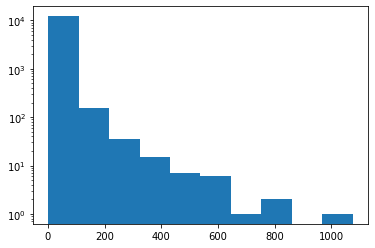

In [19]:
_ = plt.hist(user_pur_sum['hours'], log=True)

In [20]:
game_play_sum = df_play.groupby("gameName").sum()
game_play_sum.tail()

,userID,hours
gameName,,
rymdkapsel,49630184,1.1
sZone-Online,9431144920,56.7
the static speaks my name,1468962719,2.0
theHunter,19522806646,309.2
theHunter Primal,587183214,85.9


In [21]:
game_play_sum.describe()

,userID,hours
count,3.600000e+03,3600.000000
mean,2.073184e+09,957.046056
std,1.685356e+10,17930.737469
min,2.989500e+05,0.100000
25%,1.188384e+08,3.100000
50%,2.966539e+08,15.100000
75%,1.085042e+09,97.575000
max,8.762449e+11,981684.600000


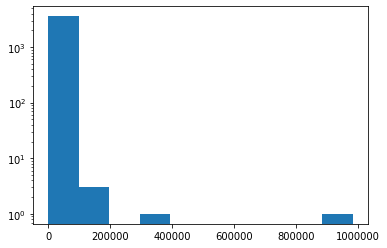

In [22]:
_ = plt.hist(game_play_sum['hours'], log=True)

In [23]:
game_pur_sum = df_purchase.groupby('gameName').sum()
game_pur_sum.describe()

,userID,hours
count,5.155000e+03,5155.000000
mean,2.573756e+09,25.123375
std,1.537558e+10,101.572586
min,2.989500e+05,1.000000
25%,1.427503e+08,2.000000
50%,4.089171e+08,5.000000
75%,1.562343e+09,18.000000
max,8.762449e+11,4841.000000


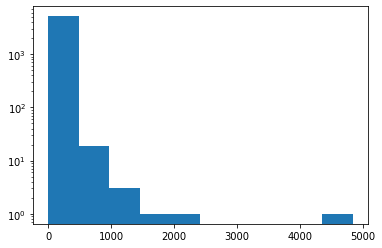

In [24]:
_ = plt.hist(game_pur_sum['hours'], log=True)

## 소결론

- 전체 구매의 45.57%는 플레이 없이 구매만 발생
- 극고수의 유저들이 플랫폼 이용시간(+구매) 대부분을 차지
- 극소수의 게임들만 인기를 얻음 \=\=\> 플랫폼 이용시간 및 게임 이용시간 분포는 압정 구조

<br>

## 더 생각해보기

**'많이 팔리는...', '많이 구매하는...' 에서 '많이' 의 기준**

### '많이 팔리는 게임'의 유형

- 대중형: 높은 구매량, 높은 플레이 시간
- 마니아형: 낮은 구매량, 높은 플레이 시간

<br>

### '많이 구매하는 유저'의 유형

- 수집형: 높은 구매량, 낮은 플레이 시간
- 즐겜형: 낮은 구매량, 높은 플레이 시간

<br>

### 새로운 특징 생성 가능 (Feature Engineering)

- Maniac Index: (평균 플레이 시간 / 구매 수)
- Collector Index: 1 - (플레이한 게임 수 / 구매한 게임 수)